In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data frame
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
# show all columns in a dataframe
pd.set_option('display.max_columns', None) 
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
#to check column names
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
# #to get info about the data shape,data type of individual columns and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

The dataframe have 27 columns and 907 rows. 12 columns have object and 15 float data type. Null values are also present in the dataset.

In [5]:
# null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

other_fuel3, wepp_id and estimated_generation_gwh has all NaN values keeping all the values in a column as NaN has no meaning so i can drop these 3 columns.


other_fuel2 has only one non null value which means all other values are NaN so this column also has nothing to do with my data training.

In [6]:
#to check for duplicate values
df.duplicated().sum()


0

In [7]:
#Droping unnecessary columns
df = df.drop(["other_fuel3"],axis=1)
df = df.drop(["wepp_id"],axis=1)
df = df.drop(["estimated_generation_gwh"],axis=1)
df = df.drop(["other_fuel2"],axis=1)
df = df.drop(["generation_gwh_2013"],axis= 1)
df = df.drop(["generation_gwh_2019"],axis=1)

In [8]:
#Checking unique values of each column
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

country, country_long, year_of_capacity_data and generation_data_source has only one unique count which means all the values of the column are same so no need to keep all these columns unnecessarily.

In [9]:
#Droping unnecessary columns
df = df.drop(["country"],axis=1)
df = df.drop(["country_long"],axis=1)
df = df.drop(["year_of_capacity_data"],axis=1)
df = df.drop(["generation_data_source"],axis=1)

In [10]:
# to check for categorical columns
obj_columns = [] 

for i in df.dtypes.index:
    if df.dtypes[i] == "O":
        obj_columns.append(i)
obj_columns     

['name',
 'gppd_idnr',
 'primary_fuel',
 'other_fuel1',
 'owner',
 'source',
 'url',
 'geolocation_source']

In [11]:
# listing all Categorical data using for_loop method
for x in obj_columns:
    print(x)
    print(df[x].value_counts())
    print("-"*70)

name
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64
----------------------------------------------------------------------
gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64
----------------------------------------------------------------------
primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
----------------------------------------------------------------------
other_fuel1
Oil             19

Name column has all unique values. Name column will not contribute any thing in my model training.So let me drop it.
gppd_idnr also has all the values unique so let me drop it as it can not contribute to model training.
Owner also looks like an unnecessary column since keeping all owner names will never distrub or give inputs to my prediction so i think i have to drop this column.
url column also has no input for prediction ao i can this column as well.

In [13]:
#Droping unnecessary columns
df = df.drop(["name"],axis=1)
df = df.drop(["gppd_idnr"],axis=1)
df = df.drop(["url"],axis=1)
df = df.drop(["owner"],axis=1)

In [14]:
#Lets extract Power_plant_age from commissioning_year by subtracting it from 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=["commissioning_year"],inplace=True)

Extracted Power_plant_age column from commissioning_year column and droped commissioning_year. As Power_plant_age may contribute more than commissioning_year for our prediction.

In [15]:
df.head(4)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,NaN,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.7745,626.239128,14.0


In [16]:
df.shape

(907, 13)

In [17]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
Power_plant_age        380
dtype: int64

In [18]:
#Replacing NaN values in numerical columns
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["Power_plant_age"] = df["Power_plant_age"].fillna(df["Power_plant_age"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())

In [19]:
#Replacing null values in categorical columns
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

Replaced all the null values in all columns.

In [20]:
df.head(3)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.20545,817.97725,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.20545,817.97725,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.20545,817.97725,751.644375,17.0


In [21]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
Power_plant_age        0
dtype: int64

All null values have been removed from the dataset.

In [22]:
df.shape

(907, 13)

In [23]:
#Checking unique values of target column (for regression model)
df['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [24]:
#Checking unique values of target column (for classification model)
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [25]:
#Checking description of data set
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,19.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,15.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,17.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,20.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,91.000000


There is a huge difference in mean and 2nq quantile of capacity_mw column which means there are extream outliers in the column.
Mean and 2nd quantile all other columns are almost same.
Mean of generation_gwh_2017 is high compared to other columns which means the power production is high in 2017.

In [26]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [27]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


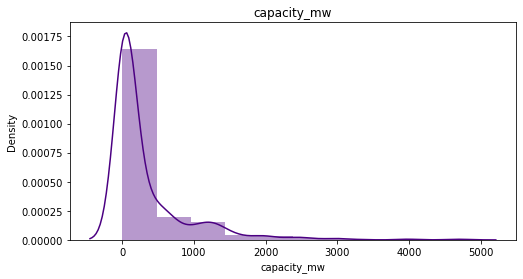

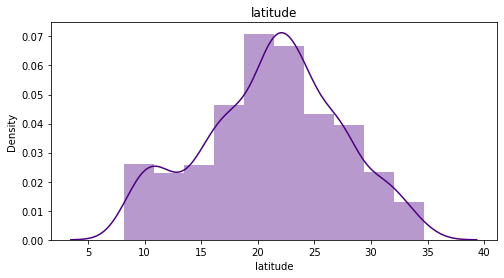

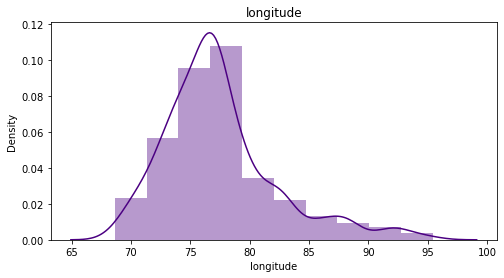

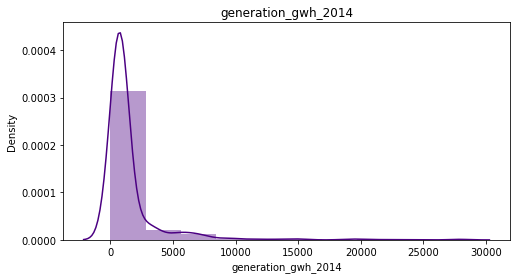

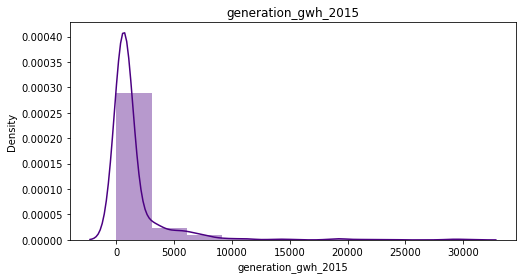

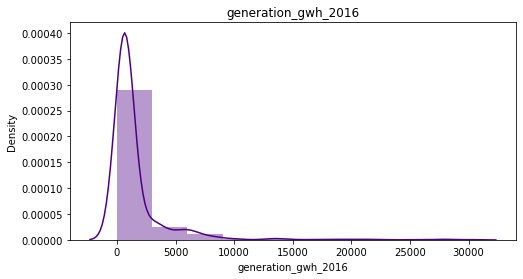

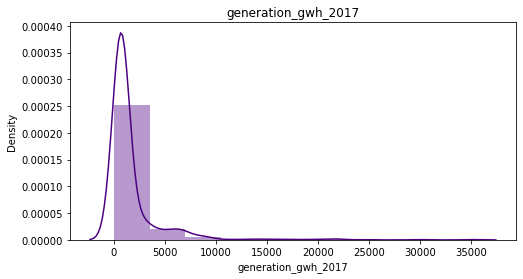

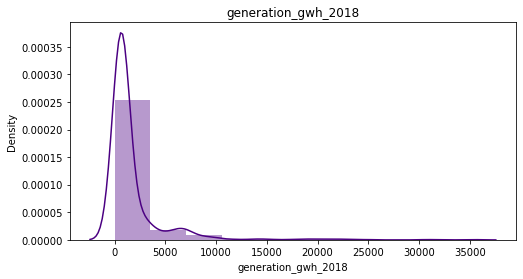

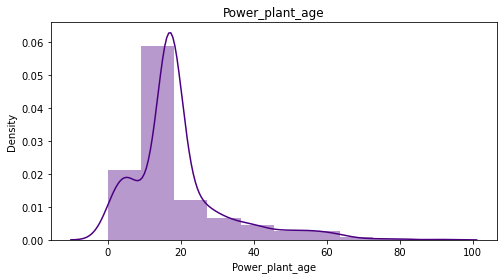

In [28]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="indigo")
    plt.title(i)
    plt.show()

Expect for latitude column all other columns are right skewed.

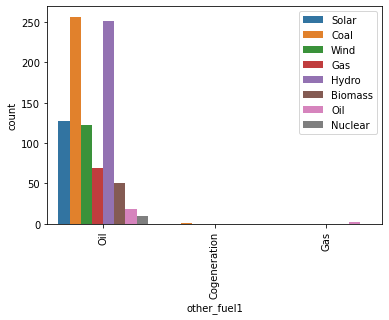

In [29]:
sns.countplot(x='other_fuel1',hue ='primary_fuel',data = df)
plt.xticks(rotation =90)
plt.legend(loc='upper right')
plt.show()

# Data Cleaning:
    
    
# Checking for outliers:

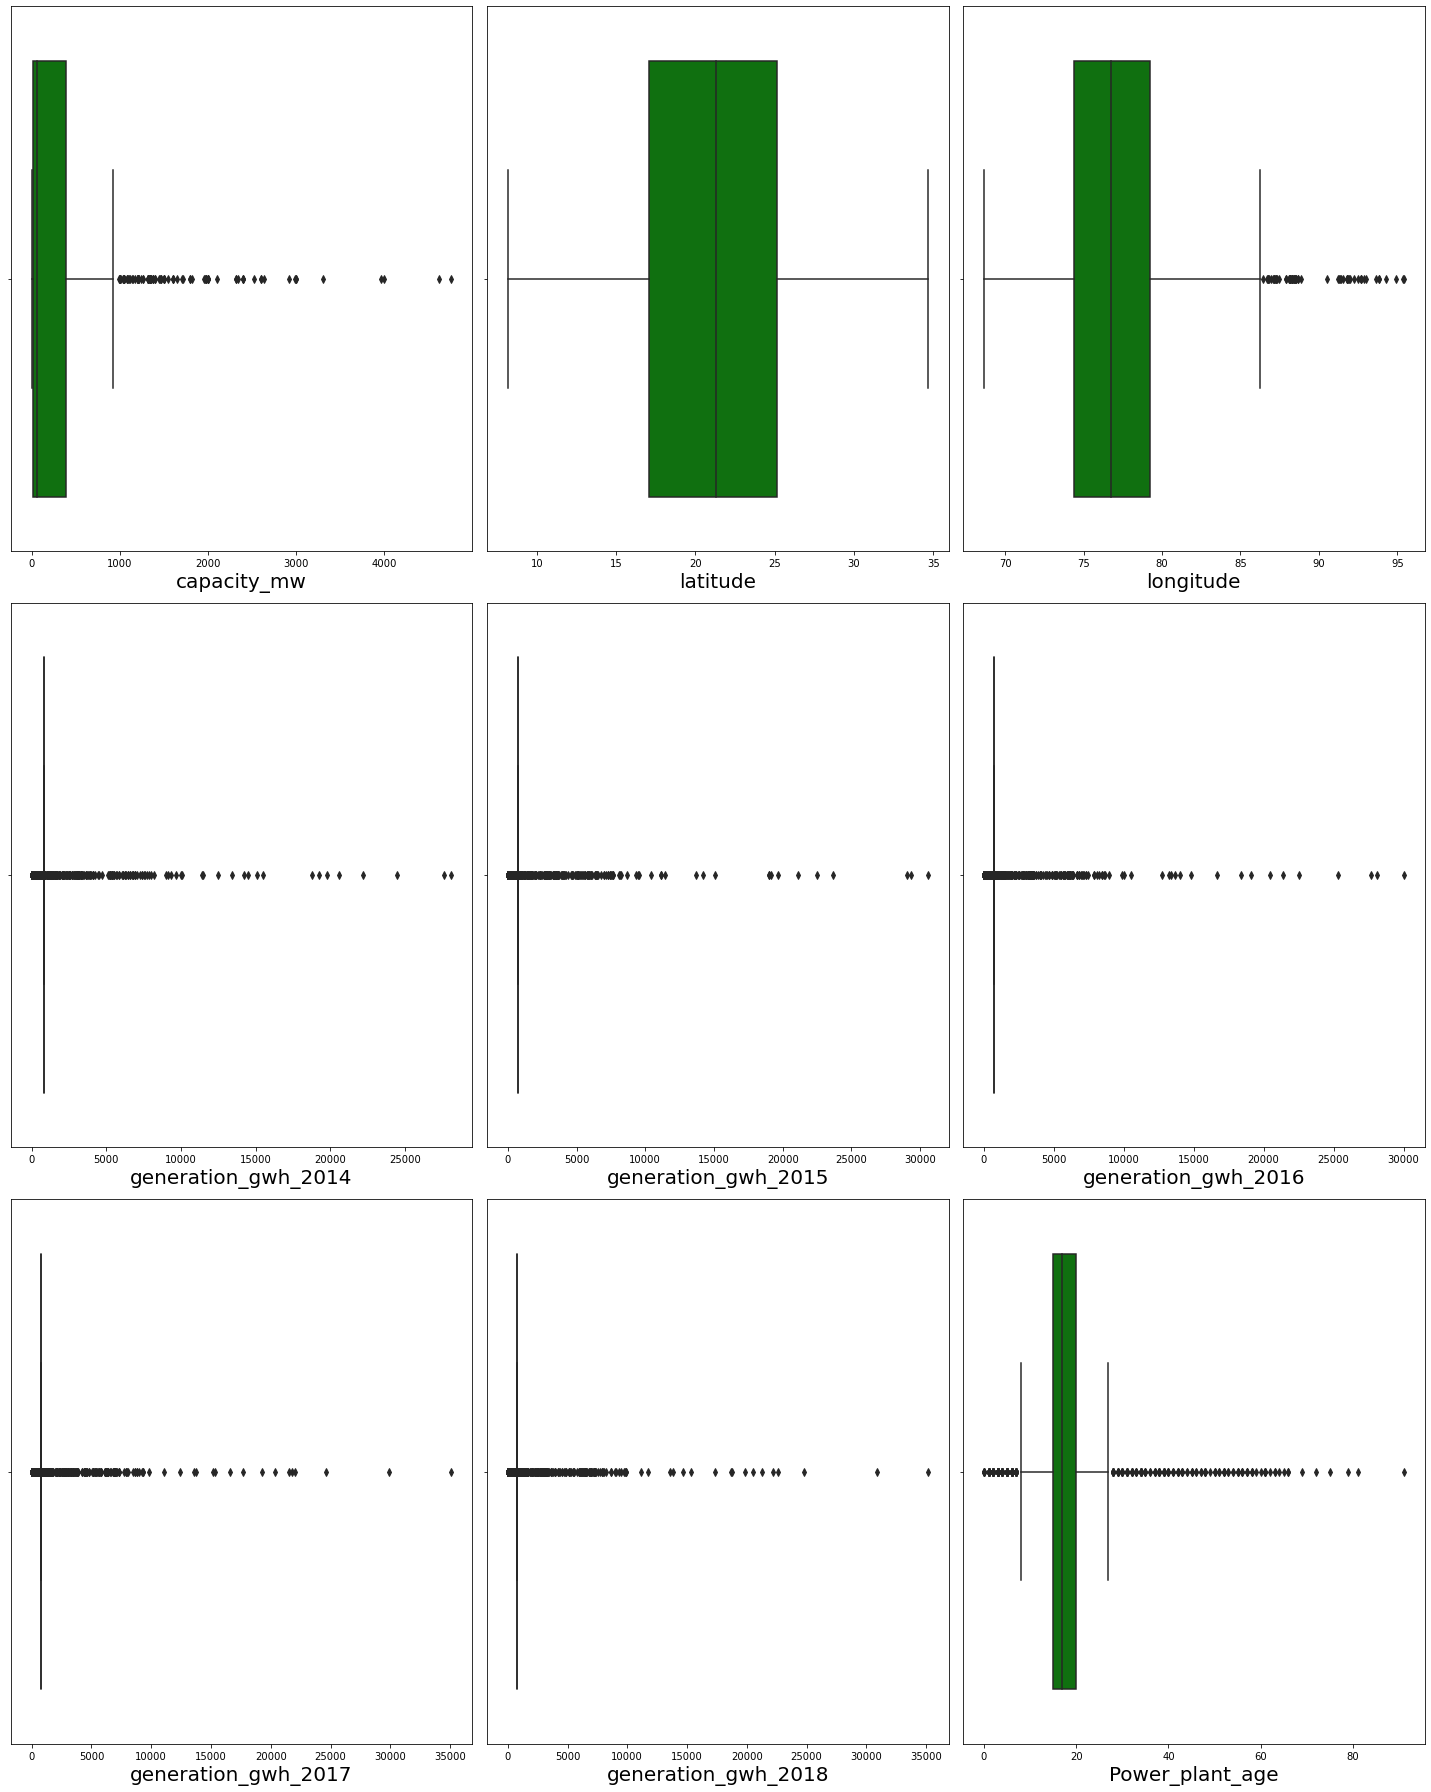

In [32]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

here are outliers in

longitude
generation_gwh_2013
generation_gwh_2014
generation_gwh_2015 generation_gwh_2016 generation_gwh_2017 generation_gwh_2018 Power_plant_age Since capacity_mw is my target no need to remove outliers in that column.

# Removing outliers:
# Zscore Method:

In [33]:
#Features having outliers
features=df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']]

In [34]:
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [35]:
#Checking shape of new dataset
df_new.shape

(851, 13)

In [36]:
#Checking dataloss
Dataloss = (((908-852)/908)*100)
Dataloss

6.167400881057269

In [37]:
cols=['primary_fuel','other_fuel1','geolocation_source','source']

In [38]:
LE=LabelEncoder()
df_new[cols]= df_new[cols].apply(LE.fit_transform)

In [39]:
df_new[cols].head()

,primary_fuel,other_fuel1,geolocation_source,source
0,6,2,1,109
1,1,2,2,174
2,7,2,2,21
3,2,2,2,22
4,1,2,2,22


# Check for the correlation


In [40]:
df_new.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
primary_fuel,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

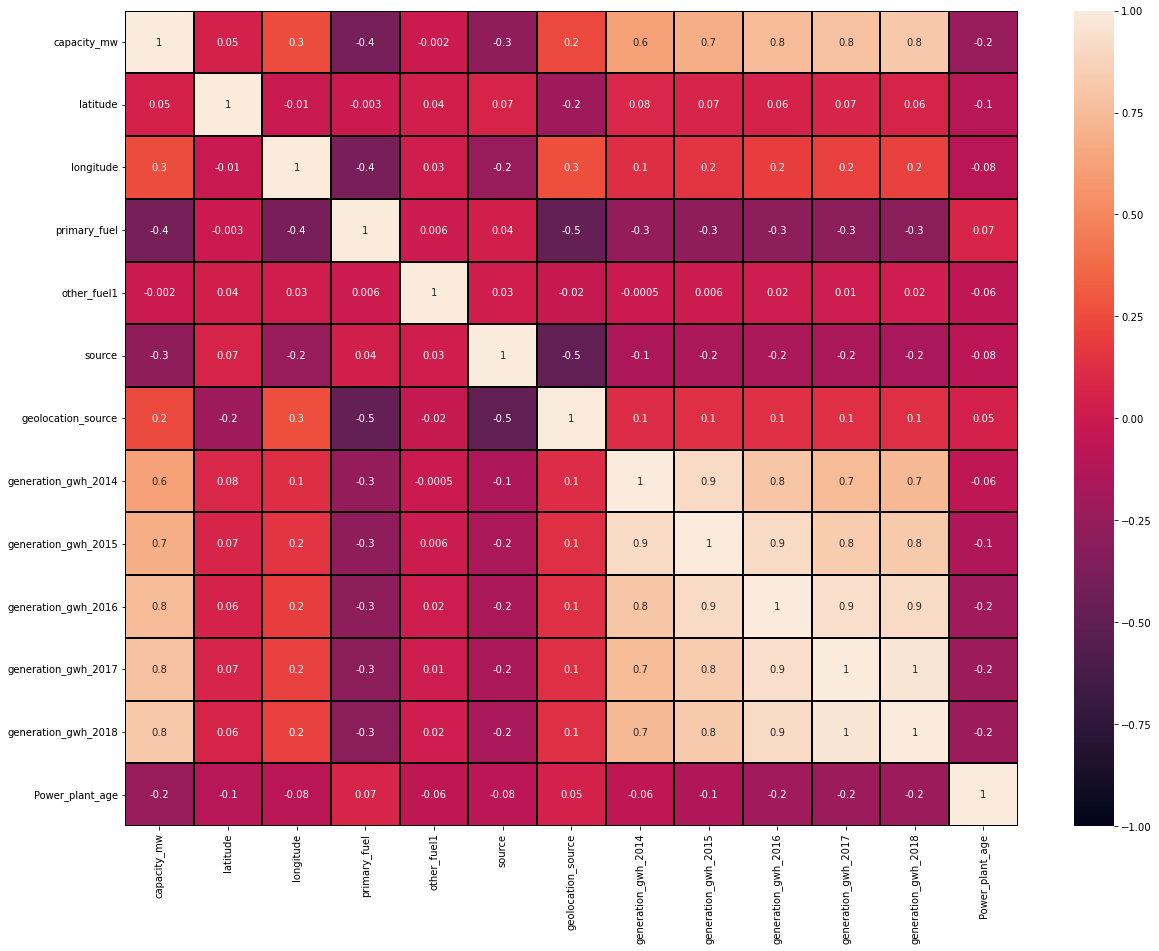

In [41]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10})
plt.yticks(rotation=0);

Above are the correlations of features.I can consider that if capacity_mw is my target then

latitude and other_fuel1 are very less correlated with capacity_mw. If i consider Fuel_type as target then

latitude, other_fuel1, source and Power_plant_age are very less correlated with Fuel_type.
If i consider the independent features then

geolocation_gwh_2013 and geolocation_gwh_2014 are highly correlated.


geolocation_gwh_2013 and geolocation_gwh_2015 are highly correlated.

geolocation_gwh_2014 and geolocation_gwh_2015 are highly correlated.

geolocation_gwh_2015 and geolocation_gwh_2016 are highly correlated.

geolocation_gwh_2016 and geolocation_gwh_2014 are highly correlated.

geolocation_gwh_2017 and geolocation_gwh_2015 are highly correlated.

capacity_mw is highly correlated with geolocation_gwh_2016.

capacity_mw is highly correlated with geolocation_gwh_2017.

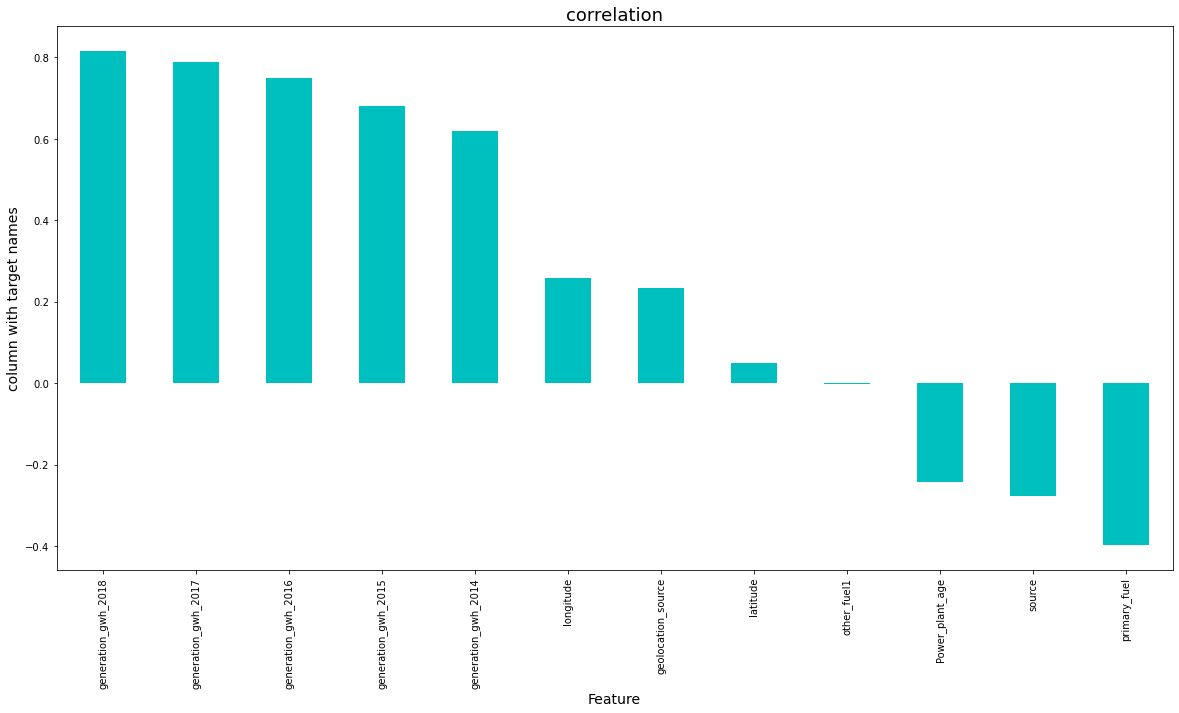

In [42]:
plt.figure(figsize=(20,10))
df_new.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


Latitude and other_fuel1 is very less correlated with Fuel_type1.So i can drop them.

In [43]:
#Droping less correlated column
df_new = df_new.drop(["other_fuel1"],axis=1)
df_new = df_new.drop(["latitude"],axis=1)

In [44]:
df_new.head(3)

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.20545,817.97725,751.644375,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.20545,817.97725,751.644375,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.20545,817.97725,751.644375,17.0


In [45]:
df_new.shape

(851, 11)

# i) Prediction and model building for capacity_mw:
First let me predict capacity_mw and since capacity_mw is a continuous column so i have to use regression models.

Let me consider the data set df_new for this perticular prediction and i'll remove skewness from independent columns.

# Separating features and label

In [48]:
x = df_new.drop("capacity_mw",axis=1)
y = df_new["capacity_mw"]

Assigned y as target variable and x as remaining features.

# Checking for skewness

In [49]:
#Checking for skewness
x.skew()

longitude              0.945877
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

There is skewness in all column except primary_fuel .geolocation_source and source are categorical columns so no need to remove skewness.

# Skewness removal

In [51]:
#list of skewed features
skew_fea=['longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']

In [52]:
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [53]:
#Removing skewness using yeo-johnson
x[skew_fea] = scaler.fit_transform(x[skew_fea].values)

In [54]:
#Checking skewness after removing skewness
x[skew_fea].skew()

longitude             -0.000128
generation_gwh_2018    0.133691
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
Power_plant_age        0.043734
dtype: float64

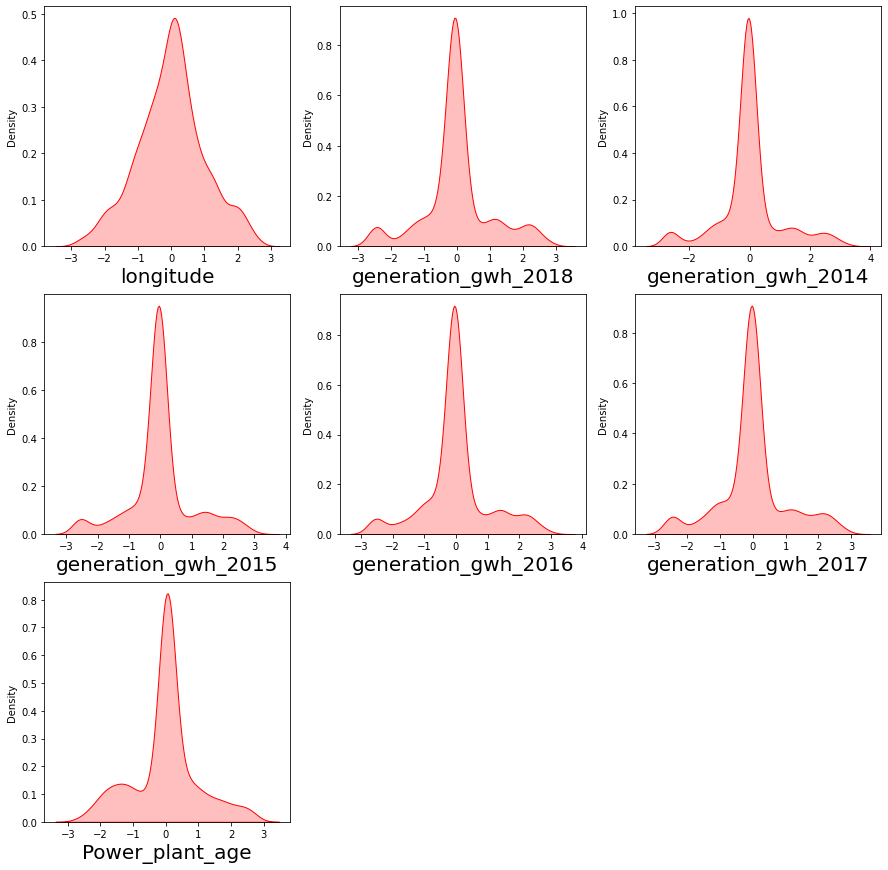

In [55]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in x[skew_fea]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1

skewness is removed.

# Scaling the data using standard scaler

In [56]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

# Using VIF to remove multicolinearity

In [57]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.309948,longitude
1,1.682645,primary_fuel
2,1.503721,source
3,1.875750,geolocation_source
4,3.603333,generation_gwh_2014
5,6.182235,generation_gwh_2015
6,9.957776,generation_gwh_2016
7,9.750143,generation_gwh_2017
8,8.951489,generation_gwh_2018
9,1.102659,Power_plant_age


Since all the VIF features are less than 10 so no need to remove any column.

Now the multicolinearity issue is resolved.

# Finding Best Random State and Accuracy

In [58]:
maxAccu=0
maxRS=0
for i in range(1,851):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8730347699249845  on Random_state  671


In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# i) DecisionTreeRegressor

In [60]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7185942298979117
mean_squared_error: 52119.65901357813
mean_absolute_error: 106.4957578125
root_mean_squared_error: 228.29730399980227


# ) RandomForestRegressor:

In [62]:
# RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8709900145397043
mean_squared_error: 23894.16695008766
mean_absolute_error: 79.55649103571056
root_mean_squared_error: 154.57738175453633


# iii) Gradient Boosting:

In [63]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8656991700904031
mean_squared_error: 24874.093582336245
mean_absolute_error: 82.03067295294281
root_mean_squared_error: 157.7152293925233


# iv) KNN

In [64]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8406820154824659
mean_squared_error: 29507.564911593752
mean_absolute_error: 85.314953125
root_mean_squared_error: 171.77766127059058


# Cross validation score

In [65]:
#cross validation to check the accuracy score
print('cross validation score of DecisionTreeRegressor model = ', cross_val_score(DTR,X,y,cv=5).mean())
print('cross validation score of RandomForestRegressor model = ', cross_val_score(RFR,X,y,cv=5).mean())
print('cross validation score of Gradient Boosting model = ', cross_val_score(GBR,X,y,cv=5).mean())
print('cross validation score of KNN model = ', cross_val_score(knn,X,y,cv=5).mean())

cross validation score of DecisionTreeRegressor model =  0.6033037672777685
cross validation score of RandomForestRegressor model =  0.7796446339433702
cross validation score of Gradient Boosting model =  0.7507356761412382
cross validation score of KNN model =  0.7246075187248919


Above are the cross validation scores of DTR, RFR, GBR and KNN.

And the difference between model r2_score and cross validation score is less for RandomForestRegressor so RFR is my best model and i have to tune it using RFR parameters.

# Hyper parameter tuning

In [66]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [76]:
parameter = {'criterion': ['mse','friedman_mse'],
            'n_estimators':[100,200,300,400],
            'max_depth': [5,6,7,8],
            'max_features':['auto','sqrt','log2'],
            'bootstrap': [True, False]}

In [77]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [79]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [81]:
Final_mod=RandomForestRegressor(bootstrap=True,criterion='friedman_mse',max_depth=8,max_features='log2',n_estimators=400,)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 87.17953300143095
mean_squared_error: 23745.013050650712
mean_absolute_error: 80.00489673883982
RMSE value: 154.09416942457852


 RandomForestRegressor gives 87.37% as r2_score which is good to save the model.


# Saving the model

In [82]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Capacity_MW.pkl")

['Capacity_MW.pkl']

# ii) Model building for Fuel_type:
    
    
Target as primary_fuel - classification model

# Separating features and label

In [83]:
x_1 = df_new.drop("primary_fuel",axis=1)
y_1 = df_new["primary_fuel"]

Checking for skewness

In [84]:
#to Check for skewness
x_1.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

There is skewness in all column. geolocation_source and source are categorical columns so no need to remove skewness.

# Removing skewness 

In [87]:

#list of skewed features
skew_feat=['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

Taking all the columns with skewness as a list with variable skew_feat.

In [88]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [89]:
#Removing skewness using yeo-johnson
x_1[skew_feat] = scaler.fit_transform(x_1[skew_feat].values)

In [90]:
# to check skewness after removing skewness
x_1[skew_feat].skew()

capacity_mw            0.016303
longitude             -0.000128
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

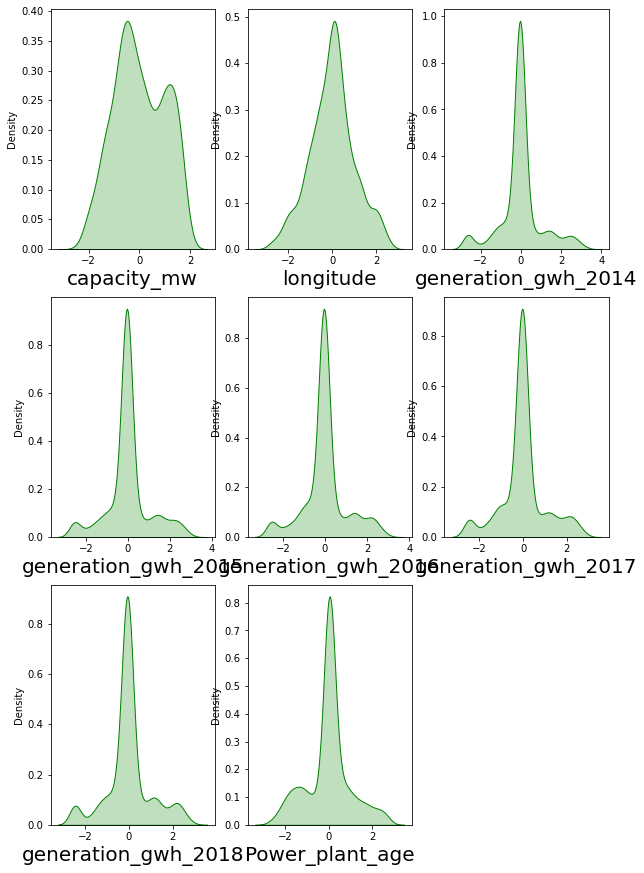

In [91]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in x_1[skew_feat]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_1[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

skewness is completly removed.



In [92]:
# scaling data using standard scalers
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_1 = pd.DataFrame(scaler.fit_transform(x_1), columns=x_1.columns)

# Using VIF to remove multicolinearity

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

,vif_Features,Features
0,1.811775,capacity_mw
1,1.193670,longitude
2,1.413037,source
3,1.590869,geolocation_source
4,3.621608,generation_gwh_2014
5,6.190754,generation_gwh_2015
6,9.961303,generation_gwh_2016
7,9.767170,generation_gwh_2017
8,8.961146,generation_gwh_2018
9,1.153813,Power_plant_age


As all the VIF features are less than 10 so no need to remove any column.

Now the multicolinearity issue is resolved.

# Balancing the target variable using oversampling

In [94]:
y_1.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [95]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_1, y_1 = SM.fit_resample(X_1,y_1)

In [96]:
# Checking the value counts again
y_1.value_counts()

6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

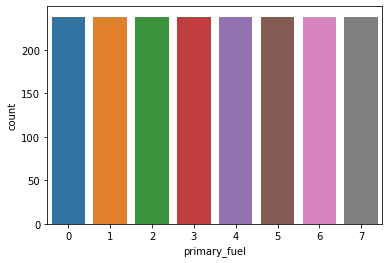

In [97]:
# Visualizing the data after oversampling
sns.countplot(y_1)

Now the target column is balanced.

# Finding Best Random State and Accuracy

In [98]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [99]:
from sklearn.tree  import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_1,y_1,test_size=.30, random_state =i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8986013986013986  on Random_state  161


In [100]:
x_train,x_test,y_train,y_test=train_test_split(X_1,y_1,test_size=.30,random_state=maxRS)

Created train and test data.

Classification Algorithms:

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# i) DecisionTreeClassifier

In [102]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
preddt=DTC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.8933566433566433
Confusion Matrix: [[67  2  2  0  0  0  0  0]
 [ 1 49 11  2  1  1  0  0]
 [ 2  3 64  8  0  1  0  0]
 [ 0  7  7 56  3  0  0  0]
 [ 0  1  0  1 66  0  0  0]
 [ 1  2  5  0  0 68  0  0]
 [ 0  0  0  0  0  0 57  0]
 [ 0  0  0  0  0  0  0 84]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.77      0.75      0.76        65
           2       0.72      0.82      0.77        78
           3       0.84      0.77      0.80        73
           4       0.94      0.97      0.96        68
           5       0.97      0.89      0.93        76
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        84

    accuracy                           0.89       572
   macro avg       0.90      0.89      0.89       572
weighted avg       0.90      0.89      0.89       572



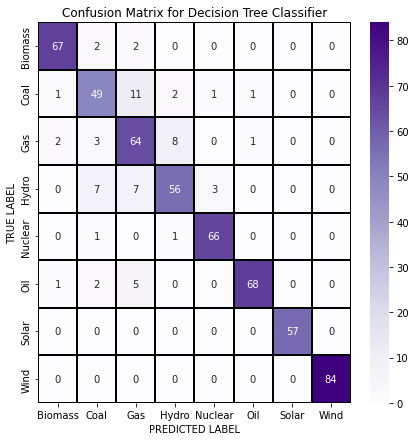

In [103]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

We can see the true values and predicted values in Decision Tree Classifier model using confusion matrix

# i) RandomForestClassifier

In [104]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predrf=RFC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.9055944055944056
Confusion Matrix: [[67  4  0  0  0  0  0  0]
 [ 2 48  9  4  2  0  0  0]
 [ 2  2 67  4  0  3  0  0]
 [ 0  6  8 55  4  0  0  0]
 [ 0  0  0  0 68  0  0  0]
 [ 0  2  2  0  0 72  0  0]
 [ 0  0  0  0  0  0 57  0]
 [ 0  0  0  0  0  0  0 84]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.77      0.74      0.76        65
           2       0.78      0.86      0.82        78
           3       0.87      0.75      0.81        73
           4       0.92      1.00      0.96        68
           5       0.96      0.95      0.95        76
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        84

    accuracy                           0.91       572
   macro avg       0.91      0.91      0.90       572
weighted avg       0.91      0.91      0.90       572



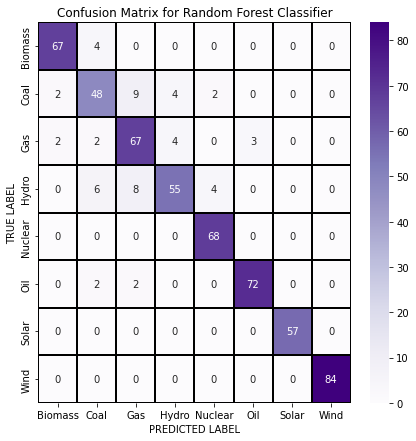

In [105]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

We can see the true values and predicted values in Random Forest Classifier model using confusion matrix.

# iii) SupportVectorClassifier

In [106]:
SV=SVC()
SV.fit(x_train,y_train)
predsv=SV.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.7884615384615384
Confusion Matrix: [[61  0  0  0  0  0  0 10]
 [10 31 10  1  9  1  0  3]
 [ 2  5 45  4  7 15  0  0]
 [ 0  9 11 40  7  0  0  6]
 [ 0  0  1  0 67  0  0  0]
 [ 0  0  0  0  0 67  0  9]
 [ 0  0  0  0  0  0 57  0]
 [ 0  0  1  0  0  0  0 83]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        71
           1       0.69      0.48      0.56        65
           2       0.66      0.58      0.62        78
           3       0.89      0.55      0.68        73
           4       0.74      0.99      0.85        68
           5       0.81      0.88      0.84        76
           6       1.00      1.00      1.00        57
           7       0.75      0.99      0.85        84

    accuracy                           0.79       572
   macro avg       0.80      0.79      0.78       572
weighted avg       0.79      0.79      0.78       572



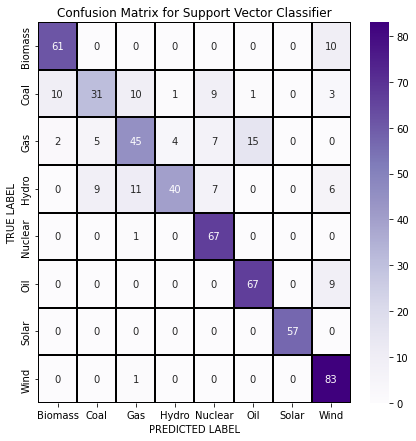

In [107]:
cm = confusion_matrix(y_test, predsv)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

# iv) K-Neighbor Classifier

In [108]:
knn=KNN()
knn.fit(x_train,y_train)
predkn=knn.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predkn))
print('Confusion Matrix:',confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

Accuracy Score: 0.8653846153846154
Confusion Matrix: [[70  0  0  0  0  0  0  1]
 [ 7 34 12  3  6  2  0  1]
 [ 2  2 63  1  1  9  0  0]
 [ 0  7 13 48  1  1  0  3]
 [ 0  1  1  0 66  0  0  0]
 [ 0  0  0  0  0 73  0  3]
 [ 0  0  0  0  0  0 57  0]
 [ 0  0  0  0  0  0  0 84]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.93        71
           1       0.77      0.52      0.62        65
           2       0.71      0.81      0.75        78
           3       0.92      0.66      0.77        73
           4       0.89      0.97      0.93        68
           5       0.86      0.96      0.91        76
           6       1.00      1.00      1.00        57
           7       0.91      1.00      0.95        84

    accuracy                           0.87       572
   macro avg       0.87      0.86      0.86       572
weighted avg       0.87      0.87      0.86       572



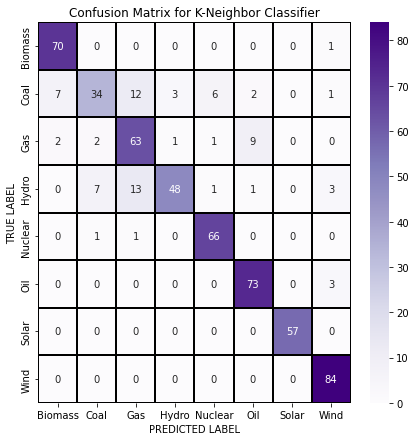

In [109]:
cm = confusion_matrix(y_test, predkn)

x_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels = ["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for K-Neighbor Classifier')
plt.show()

# Cross Validation score

In [110]:
#Importing library
from sklearn.model_selection import cross_val_score

In [111]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,X_1,y_1,cv=5).mean())

0.8776184555877883


In [112]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,X_1,y_1,cv=5).mean())

0.9180674126260533


In [113]:
# cv score for Support Vector  Classifier
print(cross_val_score(SV,X_1,y_1,cv=5).mean())

0.7962177096284018


In [114]:
# cv score for KNN Classifier
print(cross_val_score(knn,X_1,y_1,cv=5).mean())

0.8587277248238706


Above are the cross validation scores of DTC,RFC,SVC,and KNN.

The difference between Model accuracy and cross validation score is best found in KNN .

# Hyper Parameter tuning

In [116]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [117]:
parameter = {'n_neighbors':[1,2,3,4,5,6],     #parameters for KNN classifier
             'weights':['uniform','distance'],
             'leaf_size':[10,100,1000],
             'algorithm':['auto','ball_tree','kd_tree','brute']}

Giving parameters of KNN.

In [118]:
GCV=GridSearchCV(KNN(),parameter,cv=5)

Running grid search CV for KNN

In [119]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 100, 1000],
                         'n_neighbors': [1, 2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [120]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 1, 'weights': 'uniform'}

In [121]:
Final1_mod=KNN(algorithm='auto',leaf_size=10, n_neighbors=1, weights='uniform')
Final1_mod.fit(x_train,y_train)
pred=Final1_mod.predict(x_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

88.98601398601399


# ROC AUC Curve

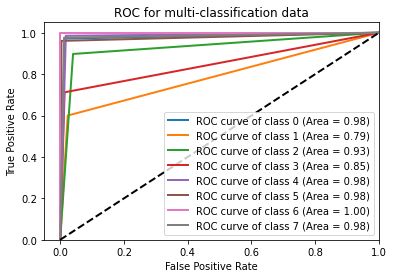

In [125]:
# Plotting ROC curve for all the models
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

classifier = OneVsRestClassifier(Final1_mod)
y_sco = classifier.fit(x_train, y_train).predict_proba(x_test)

y_test_bin  = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

false_pr = dict()
true_pr = dict()
roc_auc = dict()
for i in range(n_classes):
    false_pr[i], true_pr[i], _ = roc_curve(y_test_bin[:, i], y_sco[:, i])
    roc_auc[i] = auc(false_pr[i], true_pr[i])
   
for i in range(n_classes):
    plt.plot(false_pr[i], true_pr[i], lw=2,
             label='ROC curve of class {0} (Area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-classification data')
plt.legend(loc="lower right")
plt.show()

 Above is the roc curves of all models, best model is KNN.

# Saving the model

In [126]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final1_mod,"Fuel_type.pkl")

['Fuel_type.pkl']